In [ ]:
pip install tensorflow --user

In [3]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [4]:
#For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats):
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [5]:
#For Fashion MNIST, however, we need the list of class names to know what we are dealing with:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

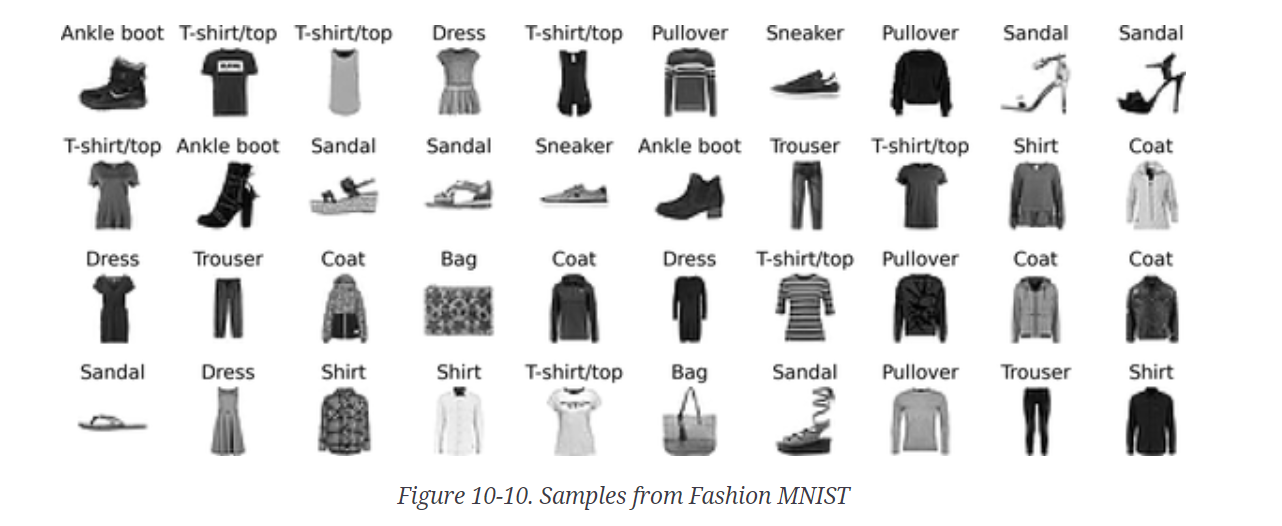
https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [6]:
#Now let’s build the neural network! Here is a classification MLP with two hidden layers:

tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

https://keras.io/api/layers/activations/

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
https://keras.io/api/losses/
https://keras.io/api/optimizers/
https://keras.io/api/metrics/

In [9]:
#Now the model is ready to be trained. 
history = model.fit(X_train, y_train, epochs=30,
                     validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7221 - accuracy: 0.7649 - val_loss: 0.4960 - val_accuracy: 0.8332
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4826 - accuracy: 0.8329 - val_loss: 0.4560 - val_accuracy: 0.8386
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4370 - accuracy: 0.8479 - val_loss: 0.4237 - val_accuracy: 0.8542
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4120 - accuracy: 0.8561 - val_loss: 0.3970 - val_accuracy: 0.8610
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3909 - accuracy: 0.8631 - val_loss: 0.3886 - val_accuracy: 0.8620
Epoch 6/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3749 - accuracy: 0.8687 - val_loss: 0.3905 - val_accuracy: 0.8618
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3628 - accuracy: 0.8711 - val_loss: 0.3715 - val_accura

If the performance on the training set is much better than on the validation set, your model is probably overfitting the training set, or there is a bug, such as a data mismatch between the training set and the validation set.

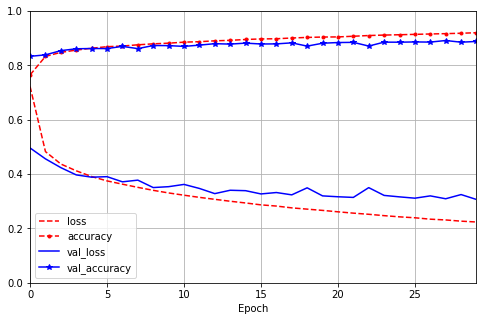

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

Hyperparameters adjust to better learning
Once you are satisfied with your model’s validation accuracy, you should evaluate it on the test set to estimate the generalization error before you deploy the model to production.

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3252 - accuracy: 0.8845


[0.3252495229244232, 0.8845000267028809]

In [13]:
# Using the model to make predictions
# we’ll just use the first three instances of the test set
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [18]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [19]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

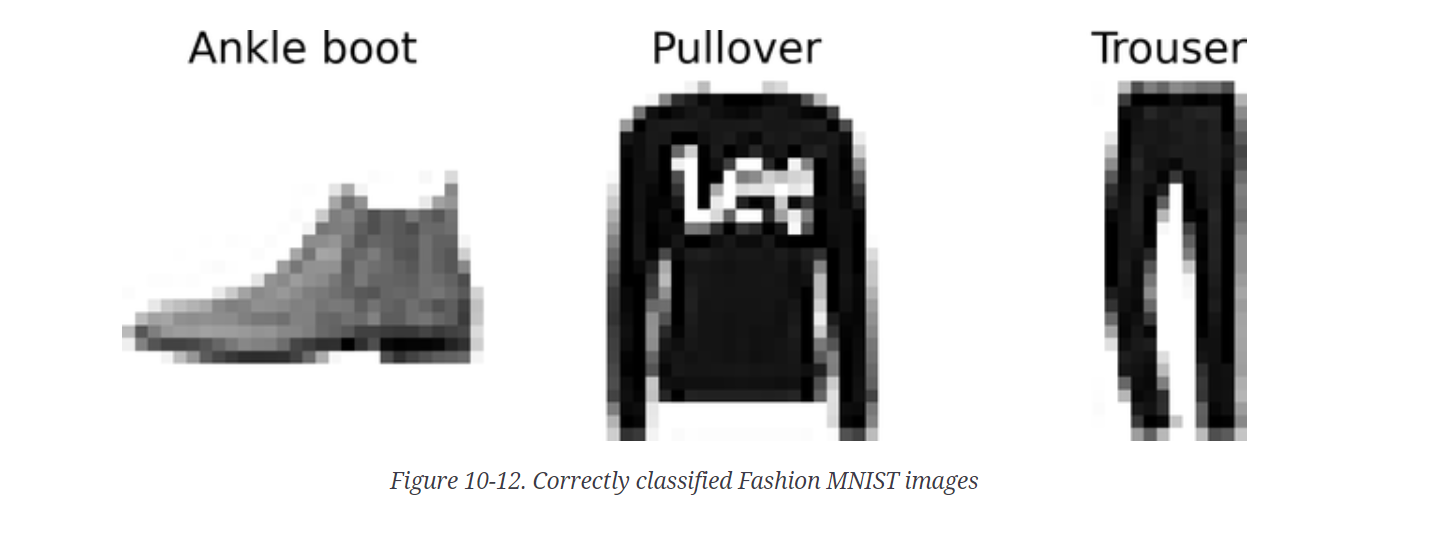